In [17]:
import re
import pandas as pd
# 载入csv文件
df = pd.read_csv('d:\\AI\\AI-job-analysis\\data_merge\\finaldata_1_2.csv', encoding='utf-8')
cv_condition = df["岗位名称"].str.contains("CV|视觉|图像")
cv_data = df[cv_condition]

In [18]:
def english_skill(string):
    # 正则表达式匹配英文单词
    pattern = re.compile(r'[a-zA-Z]+')
    matches = pattern.findall(string)
    if matches: return list(set(matches))
    return "无"

cv_data["技能"] = cv_data["岗位要求"].apply(english_skill)

C:\Users\zdong\AppData\Local\Temp\ipykernel_27380\348180168.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_data["技能"] = cv_data["岗位要求"].apply(english_skill)


In [19]:
cv_data

,岗位名称,区位,薪资,工作年限,学历,关键词,公司名,企业类别,企业规模,岗位要求,更新时间,来源,技能
7,高德—AI视觉算法工程师,北京-朝阳,25k-50k·16薪,1-3年,本科,视觉\n视频\n人脸,高德地图,互联网,1000-9999人,职位描述：\n1. 负责3D、2D人脸/人体建模或生成，包括不限于视频、文本、语音驱动人脸表...,2023-12-26,boss,"[loss, ICCV, TIP, NeurIPS, nerf, TensorFlow, d..."
13,AI算法工程师(CV方向),北京,70k-100k,经验不限,本科,深度学习\n图像算法\nC/C++\nMATLAB\nCV算法\n人脸识别\n肢体检测,某大型企业服务公司,企业服务,100-499人,985 211 大厂优先\n岗位职责\n1. 负责人脸识别和肢体检测相关算法的持续优化迭代；...,2023-12-26,boss,"[CV, Python, TensorFlow, AI, PyTorch, Linux, C]"
15,大模型算法（NLP/CV/机器学习）,北京,30k-60k·15薪,1-3年,本科,大模型算法\n图像算法\n自然语言处理算法\n语音算法\nC/C++\nPython\n分布...,某知名互联网公司,互联网,1000-9999人,岗位需求介绍：分为三大方向\n第一，机器学习，包括NLP、CV算法，做预训练方向；\n第二，...,2023-12-26,boss,"[train, DU, nlp, CV, P, RLHF, Star, AI, ok, Co..."
174,深度学习计算机视觉兼职,北京-朝阳,3500-4000元/周,经验不限,博士,机器学习\n强化学习\n大模型算法\n图像算法\n推荐算法\n自然语言处理算法\nPytho...,艾斯意,培训/辅导机构,100-499人,工作时间：不限\n工作时段：不限\n结算方式：周结\n招聘截止时间：2024-01-19\n...,2023-12-26,boss,[V]
199,多模态算法工程师（NLP+CV),北京-朝阳,40k-70k·16薪,经验不限,本科,强化学习\n机器学习\n深度学习\n自然语言处理算法\n图像算法\n多模态算法\nPytho...,BOSS直聘,人力资源服务,1000-9999人,岗位要求\n职位描述：\n1. 进行多模态（文本与CV）方向算法研究和开发。\n2. 负责图...,2023-12-26,boss,"[NLP, CV, Tensorflow, Pytorch]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,计算机视觉&三维算法专家,北京-朝阳,45k-75k·16薪,3-5年,硕士,图像处理\r\n数据处理\r\n算法研究\r\n自动驾驶\r\n定位算法\r\n激光雷达\r...,某北京大型计算机软件公司,计算机软件,2000-5000人,一、岗位职责：\r\n挑战高精度地图商业化，实时化，规模化中的技术难题，主导设计，研发创新算...,2023-12-25,猎聘,"[ML, Server, CV, Caffe, P, TensorFlow, MLLib, ..."
4179,视觉算法资深工程师,北京,25k-50k·16薪,10年以上,硕士,算法\r\npython\r\n深度学习\r\n目标检测\r\n计算机视觉,某高科技有限公司,计算机软件,1000-2000人,、负责视觉算法在机器人领域的研发，解决环境感知、行为分析等问题。\r\n2、作为tech l...,2023-12-25,猎聘,"[CV, Python, TensorFlow, C, Pytorch, Caffe, te..."
4184,图像算法工程师,北京,30k-50k·14薪,经验不限,硕士,图像检测\r\n图像分割\r\n图像优化\r\n算法设计\r\nC++\r\nOpenCV\...,某北京知名公司,在线教育,10000人以上,工作职责：\r\n1. 支持公司各业务图像智能相关应用的算法设计，能够熟练运用图像识别、目标...,2023-12-25,猎聘,"[cuBLAS, CV, Python, CUDA, TensorRT, GPU, MNN,..."
4192,图像算法工程师,北京,40k-70k·14薪,3-5年,本科,图像检测\r\n图像分割\r\n图像优化\r\n图像识别\r\n算法设计\r\nOpenCV...,某北京大型在线教育公司,在线教育,10000人以上,1. 支持公司各业务图像智能相关应用的算法设计，能够熟练运用图像识别、目标检测、图像分割等相...,2023-12-25,猎聘,"[cuBLAS, CV, Python, CUDA, TensorRT, GPU, MNN,..."


In [20]:
# 统计技能词频
from collections import Counter
skill_list = []
for i in cv_data["技能"]:
    if i != "无":
        skill_list.extend(i)

skill_count = Counter(skill_list)
skill_count = pd.DataFrame(skill_count.items(), columns=["技能", "词频"])
skill_count.sort_values(by="词频", ascending=False, inplace=True)

Text(0.5, 1.0, 'CV岗位技能词频统计')

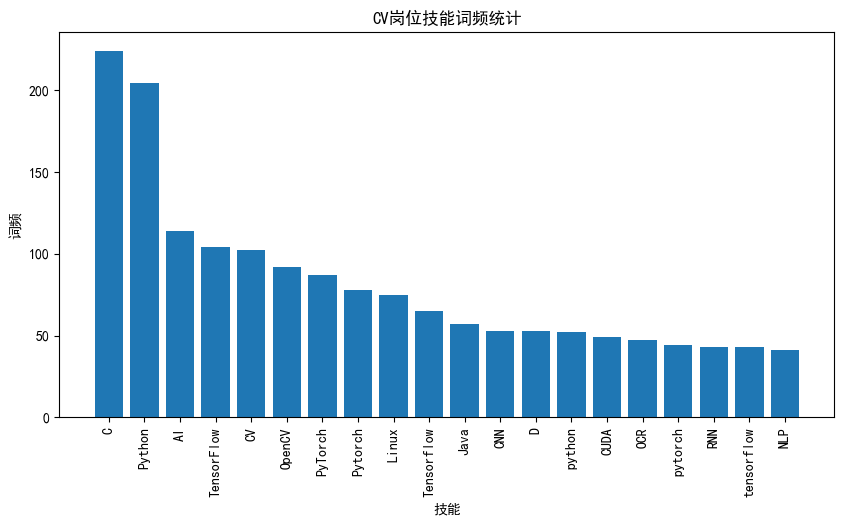

In [22]:
# 绘图
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'SimHei'
plt.figure(figsize=(10, 5))
plt.bar(skill_count["技能"][:20], skill_count["词频"][:20])
plt.xticks(rotation=90)
plt.xlabel("技能")
plt.ylabel("词频")
plt.title("CV岗位技能词频统计") 